# Read data from .txt

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [167]:
# set fixed size for plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [168]:
data = pd.read_csv('train2.txt',sep='|')
test = pd.read_csv('test2.txt', sep='|')

In [169]:
test.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,B0891376,601,1954-01,4,3,3,1,0
1,B0889436,601,1954-09,4,5,3,1,0
2,B0889461,601,1957-01,5,5,3,1,0
3,B0889491,601,1959-02,4,5,3,2,0
4,B0889492,601,1959-02,4,5,2,2,3


In [170]:
data.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0


# Information about data
## Variables
    ID_Customer: Identificador de cliente.
    Cod_Prod: Código de la modalidad de producto contratado.
    Cod_Fecha: Fecha de contratación de la modalidad de producto.
    Socio_Demo_01-05: Variables socio demográficas relacionadas con el cliente.
    

#### 1. Socio_Demo_01.

    1: Edad < 18 años
    2: Edad >= 18 años y Edad < 30 años
    3: Edad >= 30 años y Edad < 45 años
    4: Edad >= 45 años y Edad < 65 años
    5: Edad >= 65 años
        

#### 2. Socio_Demo_02.
    1: Antigüedad < 1 año
    2: Antigüedad >=1 año y Antigüedad < 5 años
    3: Antigüedad >= 5 años y Antigüedad < 10 años
    4: Antigüedad >= 10 años y Antigüedad < 20 años
    5: Antigüedad >= 20 años

#### 3. Socio_Demo_03.
    1: Ingresos < 6.000 €
    2: Ingresos >= 6.000 € and Ingresos < 12.000 €
    3: Ingresos >= 12.000 € and Ingresos < 24.000 €
    4: Ingresos >= 24.000 € and Ingresos < 32.000 €
    5: Ingresos >= 32.000 €

#### 4. Cod_Prod.: Código de la modalidad de producto contratado.
#### 5. Socio_Demo_04: Sexo (1: Hombre, 2: Mujer)
#### 6. Socio_Demo_05: Segmento (00: Particular | 01:Agricultor | 02:Comercio | 03:Autónomo)
#### 7. Cod_Fecha: Formato YYYY-MM

# Important phrases about data
    1. Train size > 3 million rows. Test size > 1 million rows.
    2. The clients in both files are different. Train > 1/2 million clients. Test > 1/4 million clients.
    3. There are almost 16% and 11% of clients with only one product in test and train, respectively.
    4. There are the same products in both files.
    5. Products are never repeated.
    6. Socio_Democratic values ARE ALWAYS CONSTANT on the user. Meaning they correspond to the time being (2017) and not when the product was bought.
    7. The clients that bought products long time ago didn't have the same options (products were not available, not yet developed) so we can not take their decisions as significant.

### Unique customers IDs for data and test

In [171]:
sortedData = data.ID_Customer.unique()
sortedData.sort()
sortedData[-10:]

array(['A0676361', 'A0676362', 'A0676363', 'A0676364', 'A0676365',
       'A0676366', 'A0676367', 'A0676368', 'A0676369', 'A0676370'], dtype=object)

In [172]:
sortedTest = test.ID_Customer.unique()
sortedTest.sort()
sortedTest[:10]

array(['B0676372', 'B0676373', 'B0676374', 'B0676376', 'B0676377',
       'B0676378', 'B0676379', 'B0676381', 'B0676382', 'B0676383'], dtype=object)

In [173]:
data[data.ID_Customer=='A0451704']

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
2253850,A0451704,2301,2014-06,2,4,2,1,0
2253851,A0451704,2602,2014-01,2,4,2,1,0
2253852,A0451704,2704,2014-03,2,4,2,1,0
2253853,A0451704,2706,2014-10,2,4,2,1,0
2253854,A0451704,9991,2014-02,2,4,2,1,0
2253855,A0451704,9993,2014-02,2,4,2,1,0
2253856,A0451704,201,2014-06,2,4,2,1,0
2253857,A0451704,301,2014-02,2,4,2,1,0
2253858,A0451704,601,2008-09,2,4,2,1,0
2253859,A0451704,1011,2014-01,2,4,2,1,0


In [174]:
test[test.ID_Customer=='B0676372']

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
3572,B0676372,601,1978-01,5,5,2,1,0


In [175]:
test[test.ID_Customer=='B0676373']

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
39563,B0676373,601,1993-07,5,5,2,1,0


## How many clients have only one product purchased?

### In test

In [176]:
oneProdTest = test.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdTest[oneProdTest==1].size, oneProdTest[oneProdTest==1].size/float(test.ID_Customer.unique().size)*100, '%'

41068 15.8570441216 %


### In train

In [177]:
oneProdData = data.groupby('ID_Customer')['Cod_Prod'].count()
print oneProdData[oneProdData==1].size, oneProdData[oneProdData==1].size/float(data.ID_Customer.unique().size)*100, '%'

73497 10.8663896979 %


## Size of dataset

In [178]:
data.shape

(3350601, 8)

In [179]:
test.shape

(1147687, 8)

In [180]:
#Number of clients
data.ID_Customer.unique().size

676370

In [181]:
test.ID_Customer.unique().size

258989

### Number of products

In [182]:
data.Cod_Prod.unique().size

94

In [183]:
test.Cod_Prod.unique().size

94

#### There the same amount of prodcuts! Are they the same products?

In [184]:
for product in test.Cod_Prod.unique():
    if product not in data.Cod_Prod.unique():
        print 'New product: ', product

#### Is there all type of features?

In [185]:
print data.Socio_Demo_01.unique()
print data.Socio_Demo_02.unique()
print data.Socio_Demo_03.unique()
print data.Socio_Demo_04.unique()
print data.Socio_Demo_05.unique()

[5 3 4 2 1]
[4 5 3 1 2]
[3 1 5 2 4]
[1 2]
[0 3 1 2]


YES!

# Missing values?

In [186]:
#Check if there is any NaN value in data
data.isnull().values.any()

False

In [187]:
test.isnull().values.any()

False

#### The dataset is clean!

# Counting purchased products by different features

In [188]:
productsPerAge = data.groupby('Socio_Demo_01')['Cod_Prod'].count()
productsPerAntiq = data.groupby('Socio_Demo_02')['Cod_Prod'].count()
productsPerIncome = data.groupby('Socio_Demo_03')['Cod_Prod'].count()
productsPerGender = data.groupby('Socio_Demo_04')['Cod_Prod'].count()

In [189]:
productsPerAge

Socio_Demo_01
1      47430
2     282960
3    1077626
4    1355148
5     587437
Name: Cod_Prod, dtype: int64

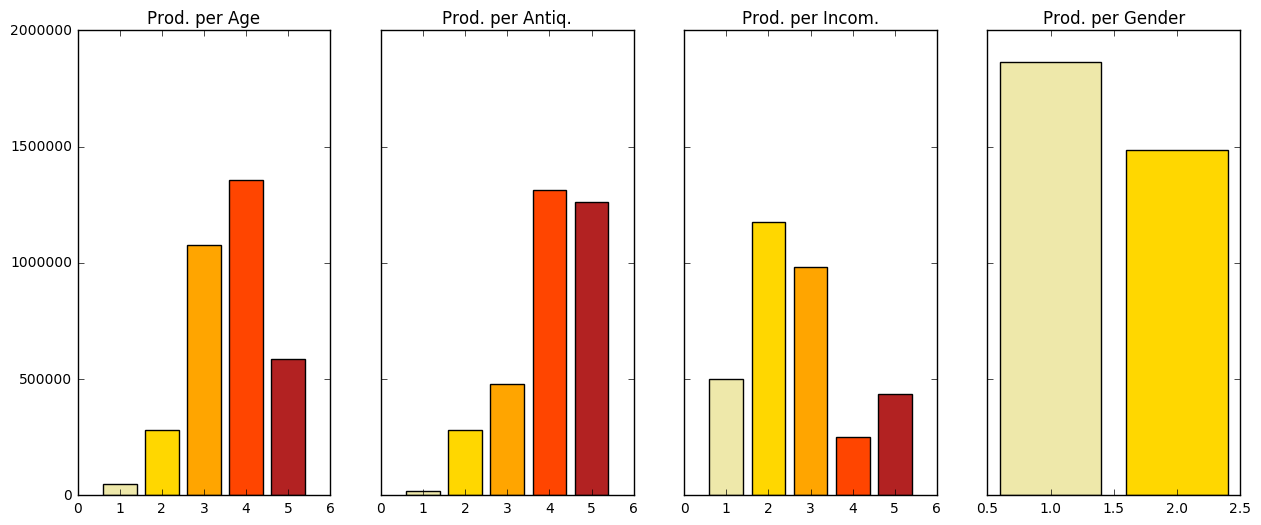

In [190]:
#Plottings
# Four subplots, sharing y axis
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
colors = ['#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
ax1.bar(-0.4+productsPerAge.index.values,productsPerAge.values, color=colors)
ax2.bar(-0.4+productsPerAntiq.index.values,productsPerAntiq.values, color=colors)
ax3.bar(-0.4+productsPerIncome.index.values,productsPerIncome.values, color=colors)
ax4.bar(-0.4+productsPerGender.index.values,productsPerGender.values, color=colors)
ax1.set_title('Prod. per Age')
ax2.set_title('Prod. per Antiq.')
ax3.set_title('Prod. per Incom.')
ax4.set_title('Prod. per Gender')

In [191]:
data[data.Cod_Prod==301].head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
8,A0000002,301,1995-03,5,5,1,1,0
10,A0000003,301,2012-05,5,5,5,2,0
16,A0000004,301,2008-10,5,5,3,1,0
18,A0000005,301,1984-04,5,5,3,1,0
20,A0000006,301,1996-10,5,5,3,1,0


In [192]:
givenProdPerAge = data[data.Cod_Prod==301].groupby('Socio_Demo_01').count()

In [193]:
givenProdPerAge.Cod_Prod

Socio_Demo_01
1       504
2     27528
3    121398
4    171156
5    105583
Name: Cod_Prod, dtype: int64

# Important things about visualization

## Plot products as a function of month and year of purchase

In [194]:
data2 = data.copy(deep=True)

In [195]:
data2['Year'] = data2.Cod_Fecha.apply(lambda x: x[:4])
data2['Month'] = data2.Cod_Fecha.apply(lambda x: x[-2:])

In [196]:
data2.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Year,Month
0,A0000001,601,2007-05,5,4,3,1,0,2007,05
1,A0000001,704,2013-04,5,4,3,1,0,2013,04
2,A0000001,2501,2006-03,5,4,3,1,0,2006,03
3,A0000001,2503,2006-03,5,4,3,1,0,2006,03
4,A0000001,1011,2011-04,5,4,3,1,0,2011,04


In [197]:
prodVsPeriod = data2.groupby(['Cod_Prod','Year','Month'])['Cod_Prod'].count()

In [198]:
prodVsPeriod.head(10)

Cod_Prod  Year  Month
101       1989  11       1
          1992  05       2
          1995  03       1
          1996  01       1
                05       1
                06       1
                08       5
                11       9
                12       1
          1997  05       1
Name: Cod_Prod, dtype: int64

In [199]:
prodVsPeriod[:,'1977']

Cod_Prod  Month
301       01         64
          02         62
          03         81
          04         77
          05         67
          06         72
          07         47
          08         84
          09        101
          10         53
          11         71
          12         42
601       01       3963
          05          2
          07          2
          08          1
708       12          1
Name: Cod_Prod, dtype: int64

In [200]:
prodVsMonth = prodVsPeriod.groupby(level=[0,2]).sum()
prodVsYear = prodVsPeriod.groupby(level=[0,1]).sum()

In [201]:
prodVsMonth.head()

Cod_Prod  Month
101       01       20
          02       19
          03       16
          04       21
          05       29
Name: Cod_Prod, dtype: int64

In [202]:
prodVsYear.head()

Cod_Prod  Year
101       1989     1
          1992     2
          1995     1
          1996    18
          1997     4
Name: Cod_Prod, dtype: int64

### Plots

In [203]:
rcParams['figure.figsize'] = 15, 25

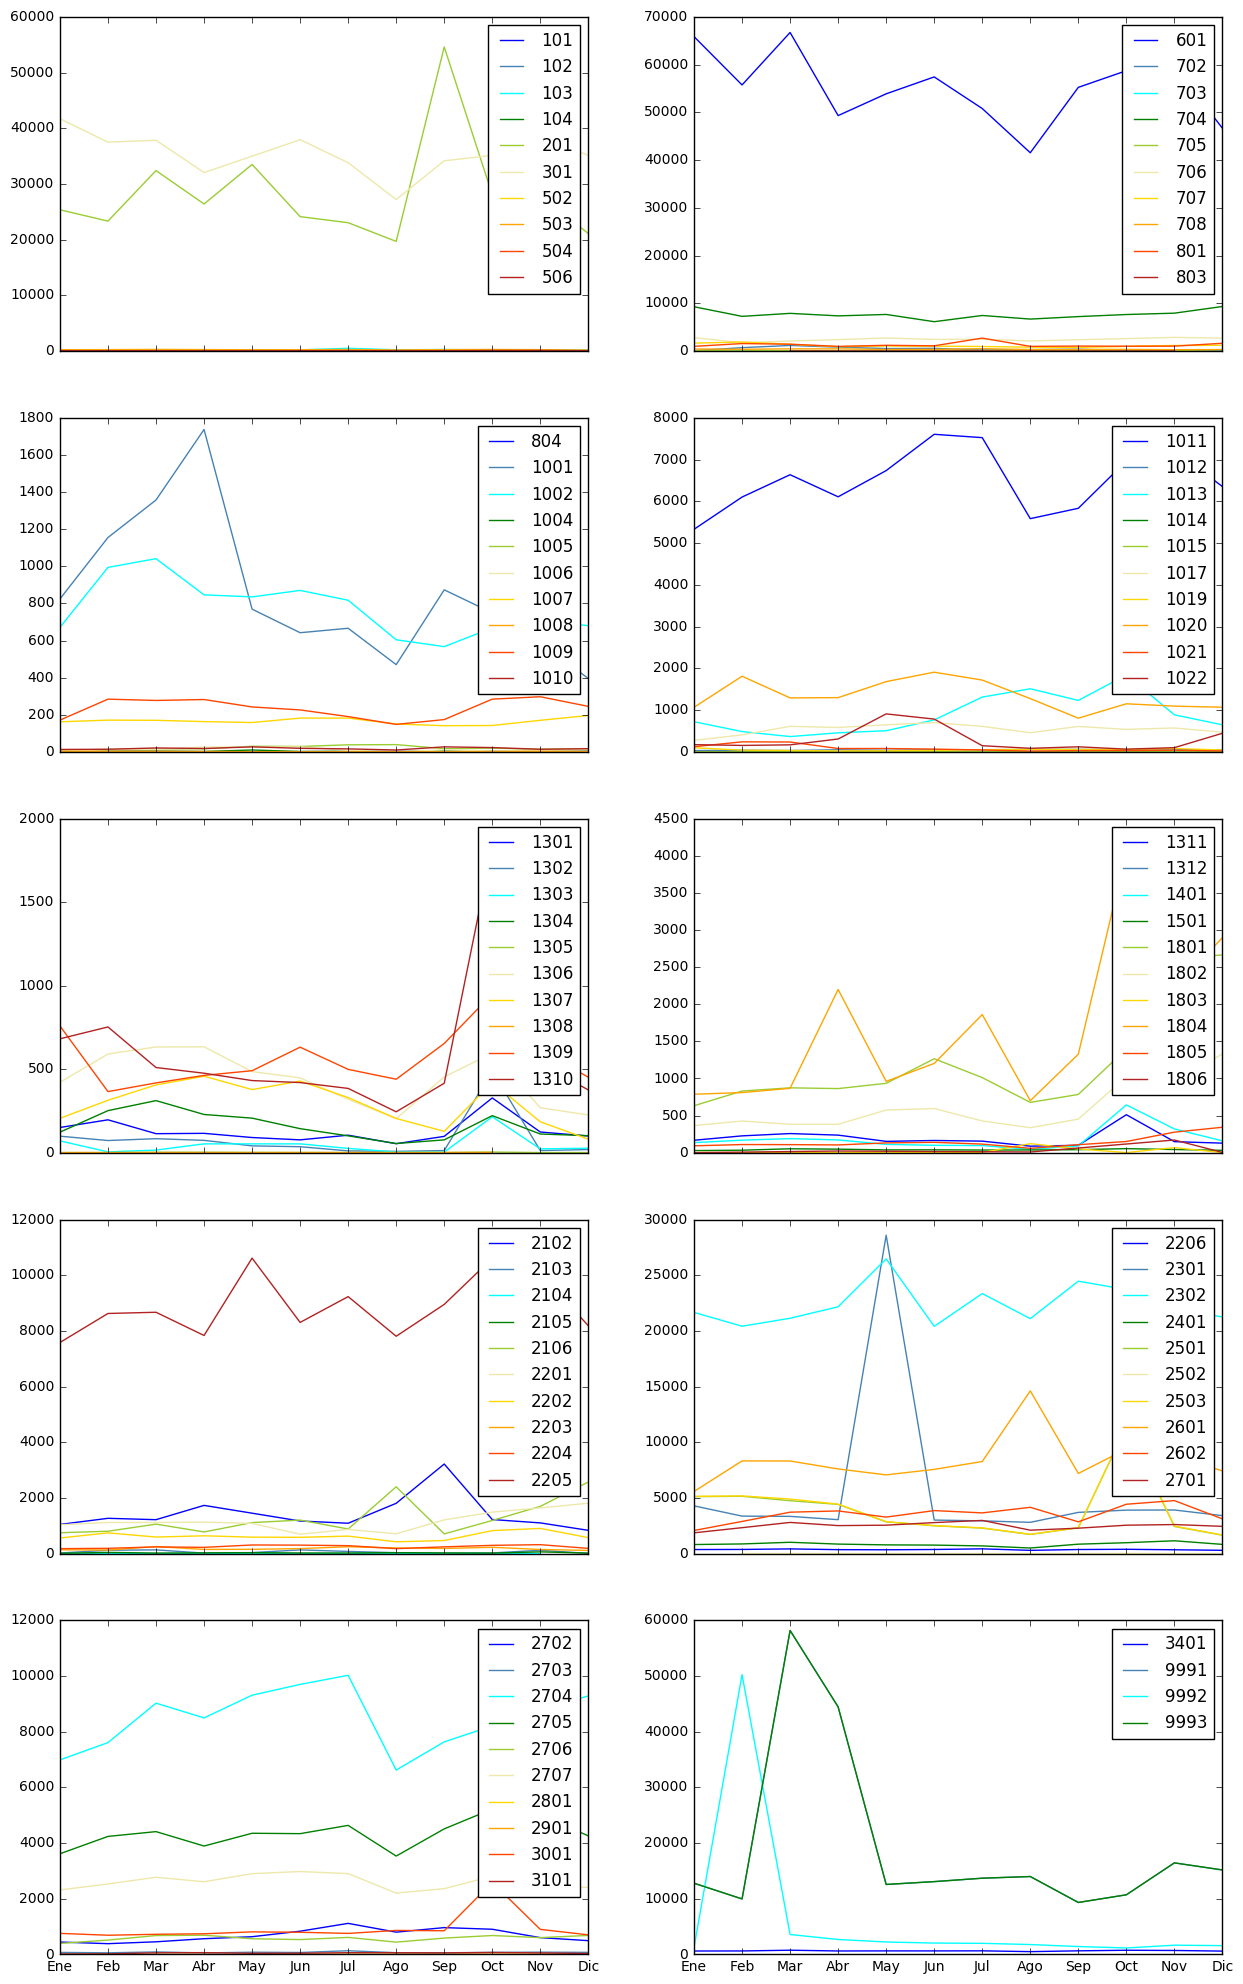

In [204]:
#Months
rows = 5
columns = 2
fig, ax = plt.subplots(rows, columns, sharex=True, sharey=False)
colors = ['#0000FF','#4682B4','#00FFFF','#008000','#9ACD32','#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
productes = data2.Cod_Prod.unique()
productes.sort()
for i in range(0,productes.size/10+1):
    for j in range(0,10):
        if 10*i+j < productes.size:
            product = productes[10*i+j]
            ax[i/columns,i%columns].plot(prodVsMonth[product].index.values.astype(str),prodVsMonth[product].values,color=colors[j],label=str(product))
    ax[i/columns,i%columns].set_xticks(np.arange(1,13))
    ax[i/columns,i%columns].set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'])
    handles, labels = ax[i/columns,i%columns].get_legend_handles_labels()
    ax[i/columns,i%columns].legend(handles,labels)

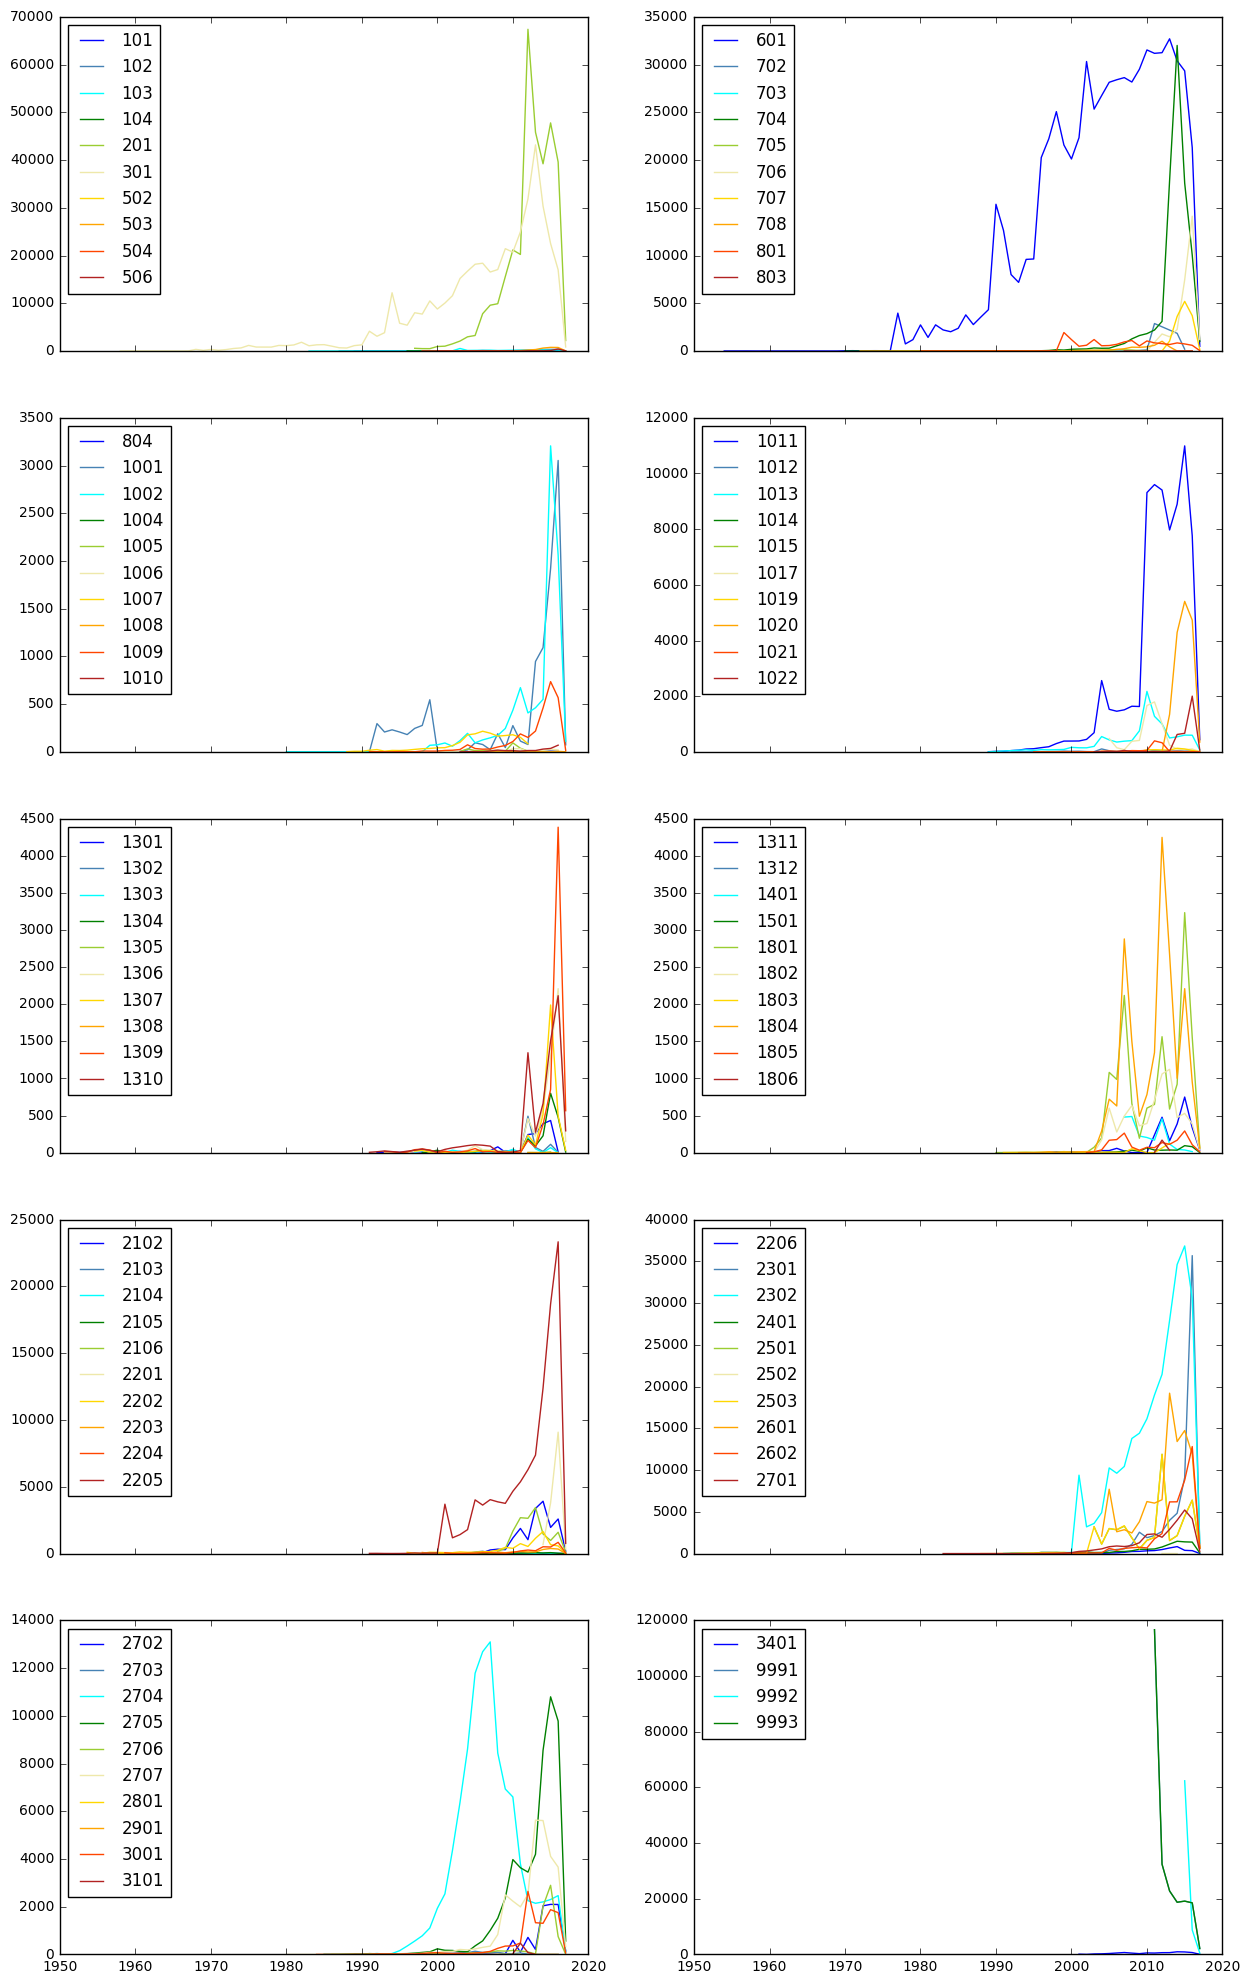

In [205]:
#Year
rows = 5
columns = 2
fig2, ax2 = plt.subplots(rows, columns, sharex=True, sharey=False)
colors = ['#0000FF','#4682B4','#00FFFF','#008000','#9ACD32','#EEE8AA','#FFD700','#FFA500','#FF4500','#B22222']
productes = data2.Cod_Prod.unique()
productes.sort()
for i in range(0,productes.size/10+1):
    for j in range(0,10):
        if 10*i+j < productes.size:
            product = productes[10*i+j]
            ax2[i/columns,i%columns].plot(prodVsYear[product].index.values.astype(str),prodVsYear[product].values,color=colors[j],label=str(product))
    handles, labels = ax2[i/columns,i%columns].get_legend_handles_labels()
    ax2[i/columns,i%columns].legend(handles,labels,loc='upper left')

## Array with clients and products

In [206]:
colnames = data.Cod_Prod.unique()
colnames.sort()
rownames = data.ID_Customer.unique()
rownames.sort()
idVSProd = pd.DataFrame(data=np.zeros((data.ID_Customer.unique().size,data.Cod_Prod.unique().size)),columns=colnames,index=rownames,dtype=int)

In [207]:
idVSProd.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
idVSProd.loc[np.array(['A0451704','A0451708'])]

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0451704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0451708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
groupedData = data.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

In [210]:
groupedTest = test.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()

In [211]:
groupedData[groupedData>1]

Series([], Name: Cod_Prod, dtype: int64)

In [212]:
groupedTest[groupedTest>1]

Series([], Name: Cod_Prod, dtype: int64)

# ···  *The clients do not repeat a product ever!* ···

In [213]:
for product in colnames:
    columna = groupedData[:,product]
    idVSProd.loc[columna.index,product] = columna.values

In [214]:
idVSProd.head(10)

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A0000003,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000006,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
A0000007,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000008,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
A0000009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000010,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
idVSProd.loc[idVSProd.loc[:,301].values > 0,301].head()

A0000002    1
A0000003    1
A0000004    1
A0000005    1
A0000006    1
Name: 301, dtype: int64

# Prepare data for model building. Separate the last product from the rest

In [216]:
data.sort_values(by='Cod_Fecha',ascending=True)

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
2451333,A0495929,601,1954-03,4,5,1,2,0
2451337,A0495930,601,1954-03,4,5,5,1,0
2451597,A0495990,601,1954-09,4,5,2,2,0
2451390,A0495941,601,1956-05,5,5,3,1,0
2451523,A0495975,601,1956-11,4,5,2,1,0
2451285,A0495919,601,1956-12,5,5,3,1,0
2451913,A0496047,601,1957-01,5,5,3,2,0
2451439,A0495955,601,1957-01,5,5,2,1,0
2451421,A0495948,601,1957-01,5,5,2,1,0
2451388,A0495940,601,1957-02,5,5,2,1,0


In [217]:
y_train = data.groupby('ID_Customer').last()

In [218]:
y_train = y_train[['Cod_Prod','Cod_Fecha']]

In [219]:
y_train

,Cod_Prod,Cod_Fecha
ID_Customer,,
A0000001,1011,2011-04
A0000002,301,1995-03
A0000003,201,2016-02
A0000004,201,2014-12
A0000005,601,1984-04
A0000006,2302,2015-05
A0000007,301,2012-08
A0000008,801,2014-03
A0000009,1013,2006-09


# Transformed data considering only the last N years

In [220]:
N_YEARS=2017-1990

In [221]:
dataLastN = data2.copy(deep=True)

In [245]:
dataLastN.head(10)

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Year,Month
2439559,A0493534,601,1990-01,5,5,2,1,0,1990,01
2441059,A0493828,601,1990-01,5,5,3,1,0,1990,01
216182,A0042276,601,1990-01,4,5,2,1,0,1990,01
51119,A0009225,601,1990-01,5,5,2,1,0,1990,01
2441034,A0493823,601,1990-01,5,4,2,2,0,1990,01
50973,A0009202,601,1990-01,5,5,2,1,0,1990,01
2430240,A0491610,601,1990-01,5,5,3,1,0,1990,01
2445771,A0494787,601,1990-01,5,5,2,1,0,1990,01
218206,A0042571,601,1990-01,4,5,2,1,0,1990,01
50930,A0009190,601,1990-01,5,5,2,1,0,1990,01


In [223]:
dataLastN.Year = dataLastN.Year.astype(int)

In [224]:
dataPrevious = dataLastN[dataLastN['Year'] < 2017-N_YEARS]

In [225]:
dataPrevious.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Year,Month
9,A0000003,601,1985-11,5,5,5,2,0,1985,11
18,A0000005,301,1984-04,5,5,3,1,0,1984,04
19,A0000005,601,1984-04,5,5,3,1,0,1984,04
41,A0000009,601,1982-01,4,5,2,1,0,1982,01
60,A0000014,601,1977-01,5,5,1,2,0,1977,01


In [226]:
oldProdCount = dataPrevious.groupby('ID_Customer')['ID_Customer'].count()

In [227]:
oldProdCount[:10]

ID_Customer
A0000003    1
A0000005    2
A0000009    1
A0000014    1
A0000016    2
A0000021    1
A0000022    1
A0000024    1
A0000026    1
A0000031    1
Name: ID_Customer, dtype: int64

In [228]:
dataLastN = dataLastN[dataLastN.Year >= 2017-N_YEARS]

# Select the clients which are useful for a supervised classifier, that is, those with a recent product purchased

In [230]:
#Sort data by date
dataLastN.sort_values(by='Cod_Fecha',inplace=True)

In [231]:
#Last product of every customer

idAndLastProd = dataLastN.groupby('ID_Customer').last()

In [232]:
idAndLastProd.head()

,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Year,Month
ID_Customer,,,,,,,,,
A0000001,704,2013-04,5,4,3,1,0,2013,04
A0000002,9992,2015-02,5,5,1,1,0,2015,02
A0000003,201,2016-02,5,5,5,2,0,2016,02
A0000004,2301,2016-05,5,5,3,1,0,2016,05
A0000006,2302,2015-05,5,5,3,1,0,2015,05


In [233]:
idAndLastProd.shape

(670160, 9)

In [234]:
#Years from today in which last product is considered
YEARS_LAST_PRODUCT = 5

In [235]:
print 'Clients with older products (they fall out of the classifier): ', idAndLastProd[idAndLastProd.Year < 2017 - YEARS_LAST_PRODUCT].shape[0], idAndLastProd[idAndLastProd.Year < 2017 - YEARS_LAST_PRODUCT].shape[0]/float(idAndLastProd.shape[0])*100, '%'
print 'Clients with recent products: ', idAndLastProd[idAndLastProd.Year >= 2017 - YEARS_LAST_PRODUCT].shape[0], idAndLastProd[idAndLastProd.Year >= 2017 - YEARS_LAST_PRODUCT].shape[0]/float(idAndLastProd.shape[0])*100, '%'

Clients with older products (they fall out of the classifier):  148053 22.0921869404 %
Clients with recent products:  522107 77.9078130596 %


In [236]:
clients_sup = idAndLastProd[idAndLastProd.Year >= 2017 - YEARS_LAST_PRODUCT].index.values
clients_unsup = idAndLastProd[idAndLastProd.Year < 2017 - YEARS_LAST_PRODUCT].index.values

In [237]:
#Returns the dataframe with the corresponding clients
def selectClients(data,clients):
    #df is a dataframe
    #clients is an array of strings
    df = pd.DataFrame(columns=data.columns.values)
    df = data[data.ID_Customer.isin(clients)]
    
    return df

In [238]:
data_sup = selectClients(dataLastN,clients_sup)

In [239]:
print data_sup.shape, data_sup.ID_Customer.unique().size

(2935685, 10) 522107


In [240]:
data_unsup = selectClients(dataLastN,clients_unsup)

In [241]:
print data_unsup.shape, data_unsup.ID_Customer.unique().size

(361939, 10) 148053


## ID vs Products in last N years

In [291]:
colnames = dataLastN.Cod_Prod.unique()
colnames.sort()
rownames = dataLastN.ID_Customer.unique()
rownames.sort()
idVSProdLastN = pd.DataFrame(data=np.zeros((rownames.size,colnames.size)),columns=colnames,index=rownames,dtype=int)

In [292]:
groupedDataLastN = dataLastN.groupby(['ID_Customer','Cod_Prod'])['Cod_Prod'].count()
groupedDataLastN.head(10)

ID_Customer  Cod_Prod
A0000001     601         1
             704         1
             1011        1
             2501        1
             2503        1
A0000002     301         1
             601         1
             801         1
             9992        1
A0000003     201         1
Name: Cod_Prod, dtype: int64

In [293]:
dataLastN[dataLastN.ID_Customer=='A0000001']

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Year,Month
2,A0000001,2501,2006-03,5,4,3,1,0,2006,03
3,A0000001,2503,2006-03,5,4,3,1,0,2006,03
0,A0000001,601,2007-05,5,4,3,1,0,2007,05
4,A0000001,1011,2011-04,5,4,3,1,0,2011,04
1,A0000001,704,2013-04,5,4,3,1,0,2013,04


In [294]:
lastProduct = dataLastN.groupby('ID_Customer')['Cod_Prod'].last()
lastProduct.head(10)

ID_Customer
A0000001     704
A0000002    9992
A0000003     201
A0000004    2301
A0000006    2302
A0000007     301
A0000008    2707
A0000009    1013
A0000010     301
A0000011     704
Name: Cod_Prod, dtype: int64

### We put the last product to 0 in groupedDataLastN

In [295]:
groupedDataLastN.loc[zip(lastProduct.index.values,lastProduct.values)] = 0

In [296]:
groupedDataLastN.head(10)

ID_Customer  Cod_Prod
A0000001     601         1
             704         0
             1011        1
             2501        1
             2503        1
A0000002     301         1
             601         1
             801         1
             9992        0
A0000003     201         0
Name: Cod_Prod, dtype: int64

In [297]:
for product in groupedDataLastN.index.levels[1].values:
    columna = groupedDataLastN[:,product]
    idVSProdLastN.loc[columna.index,product] = columna.values

In [298]:
idVSProdLastN.head()

,101,102,103,104,201,301,502,503,504,506,...,2706,2707,2801,2901,3001,3101,3401,9991,9992,9993
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000006,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [68]:
#idVSProdLastN['Previous'] = np.zeros(idVSProdLastN.shape[0],dtype=int)

In [69]:
#idVSProdLastN.head()

,101,102,103,104,201,301,502,503,504,506,...,2707,2801,2901,3001,3101,3401,9991,9992,9993,Previous
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A0000003,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#idVSProdLastN['Previous'].loc[oldProdCount.index] = oldProdCount.values

In [71]:
#idVSProdLastN.head()

,101,102,103,104,201,301,502,503,504,506,...,2707,2801,2901,3001,3101,3401,9991,9992,9993,Previous
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
A0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
A0000003,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
A0000004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [299]:
customers = dataLastN.groupby('ID_Customer')['Socio_Demo_01','Socio_Demo_02','Socio_Demo_03','Socio_Demo_04','Socio_Demo_05'].first()

In [300]:
customers[:10]

,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
ID_Customer,,,,,
A0000001,5,4,3,1,0
A0000002,5,5,1,1,0
A0000003,5,5,5,2,0
A0000004,5,5,3,1,0
A0000006,5,5,3,1,0
A0000007,5,5,2,2,0
A0000008,3,5,2,1,3
A0000009,4,5,2,1,0
A0000010,5,5,2,2,0


In [301]:
socioDemoCol = ['Socio_Demo_01_1','Socio_Demo_01_2','Socio_Demo_01_3','Socio_Demo_01_4','Socio_Demo_01_5','Socio_Demo_02_1','Socio_Demo_02_2','Socio_Demo_02_3','Socio_Demo_02_4','Socio_Demo_02_5','Socio_Demo_03_1','Socio_Demo_03_2','Socio_Demo_03_3','Socio_Demo_03_4','Socio_Demo_03_5','Socio_Demo_04_1','Socio_Demo_04_2','Socio_Demo_05_1','Socio_Demo_05_2']

In [302]:
idVSProdLastN['Socio_Demo_01_1'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_01_2'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_01_3'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_01_4'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_01_5'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_02_1'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_02_2'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_02_3'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_02_4'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_02_5'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_03_1'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_03_2'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_03_3'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_03_4'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_03_5'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_04_1'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_04_2'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_05_1'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_05_2'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_05_3'] = np.zeros(idVSProdLastN.shape[0],dtype=int)
idVSProdLastN['Socio_Demo_05_4'] = np.zeros(idVSProdLastN.shape[0],dtype=int)

In [303]:
idVSProdLastN.head()

,101,102,103,104,201,301,502,503,504,506,...,Socio_Demo_03_2,Socio_Demo_03_3,Socio_Demo_03_4,Socio_Demo_03_5,Socio_Demo_04_1,Socio_Demo_04_2,Socio_Demo_05_1,Socio_Demo_05_2,Socio_Demo_05_3,Socio_Demo_05_4
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000006,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### One-hot encoding

In [304]:
def oneHotEnconding(element, size):
    elFormat = '{0:0'+str(size)+'d}'
    return list(elFormat.format(element))

In [305]:
def matrixOHEncoding(matrix, sizes):
    assert matrix.shape[1] == sizes.size, 'Size vector of one hot encoding and number of columns are incongruent.'
    newMatrix = np.empty((0,sum(sizes)),dtype=int)
    for vector in matrix:
        i = 0
        newRow = np.empty(0,dtype=int)
        for item in vector:
            newRow = np.append(newRow,oneHotEnconding(item,sizes[i]) )
            i += 1
        newRow = newRow.astype(int)
        newMatrix = np.vstack((newMatrix,newRow))
    return newMatrix

In [312]:
matrixOHEncoding(a[:10],np.array([5,5,5,2,4]))

array([[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [311]:
a=np.power(10,customers.values-1)

In [310]:
a[:10]

array([[10000,  1000,   100,     1,     1],
       [10000, 10000,     1,     1,     1],
       [10000, 10000, 10000,    10,     1],
       [10000, 10000,   100,     1,     1],
       [10000, 10000,   100,     1,     1],
       [10000, 10000,    10,    10,     1],
       [  100, 10000,    10,     1,  1000],
       [ 1000, 10000,    10,     1,     1],
       [10000, 10000,    10,    10,     1],
       [ 1000, 10000,  1000,    10,     1]])

In [308]:
#We sum 1 to Socio_Demo_05 in order to compute one hot encoding
customers.Socio_Demo_05 += 1

In [309]:
customers.values

array([[5, 4, 3, 1, 1],
       [5, 5, 1, 1, 1],
       [5, 5, 5, 2, 1],
       ..., 
       [1, 1, 1, 2, 1],
       [3, 2, 3, 1, 1],
       [3, 2, 2, 1, 1]])

In [313]:
customers.index.size

670160

In [314]:
idVSProdLastN.shape

(670160, 115)

In [ ]:
#Introduce one-hot encoding to matrix. Very slow...
binaryMatrix = np.power(10,customers.values-1)
i = 0
for customer in customers.index:
    idVSProdLastN.loc[customer,socioDemoCol] = matrixOHEncoding(binaryMatrix[i],np.array([5,5,5,2,4]))
    i += 1
    if i%100:
        print i/customers.index.size

In [284]:
idVSProdLastN.head()

,101,102,103,104,201,301,502,503,504,506,...,Socio_Demo_03_2,Socio_Demo_03_3,Socio_Demo_03_4,Socio_Demo_03_5,Socio_Demo_04_1,Socio_Demo_04_2,Socio_Demo_05_1,Socio_Demo_05_2,Socio_Demo_05_3,Socio_Demo_05_4
A0000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000004,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
